# Random Forest Classifier

### 1. Data Exploration and Preprocessing:

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [4]:
# load dataset
tele_churn_data = pd.read_csv("customer_churn.csv")

In [7]:
# first 5 rows of dataset
tele_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Check no. of rows and columns
tele_churn_data.shape

(7043, 21)

In [11]:
# check the summary of dataset
tele_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Columns names
tele_churn_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [15]:
# Checking the data types of all the columns
tele_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
# Check the descriptive statistics of numeric variables
tele_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
# check null value
tele_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

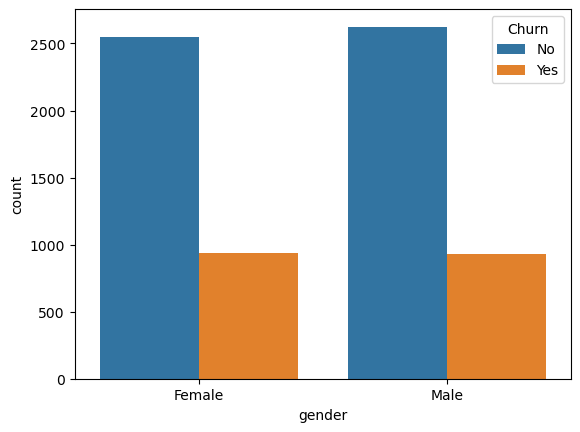

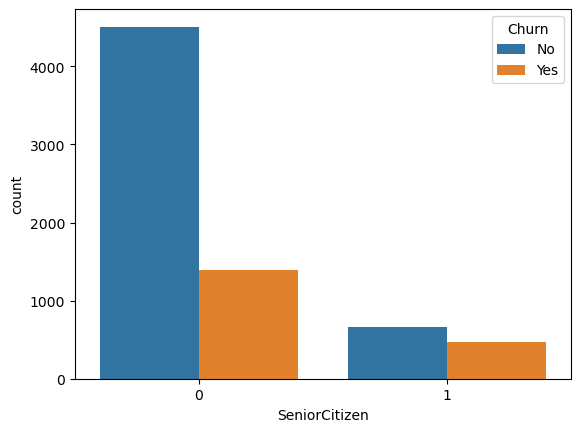

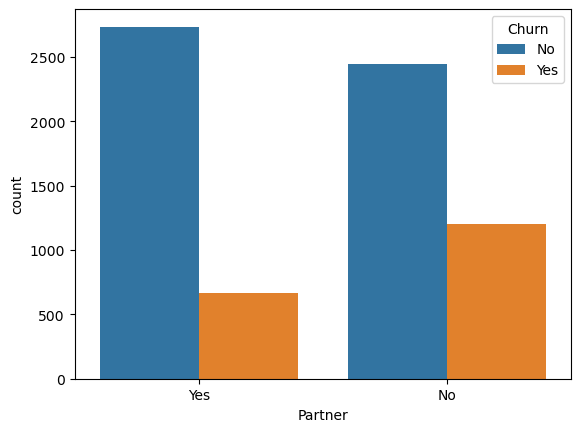

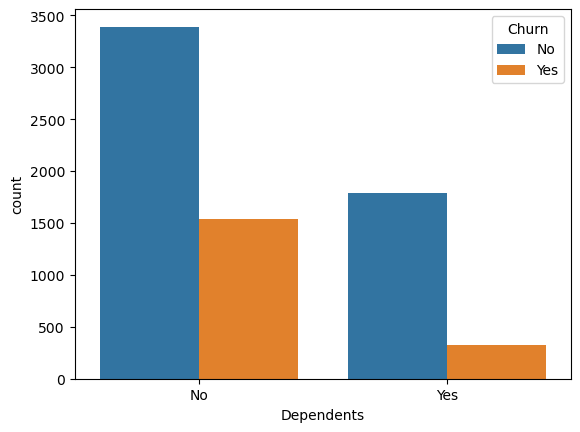

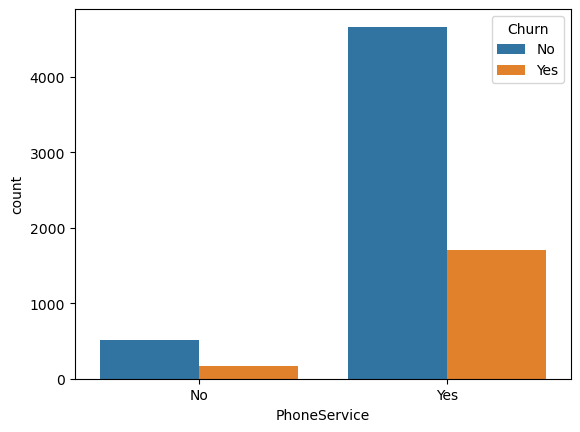

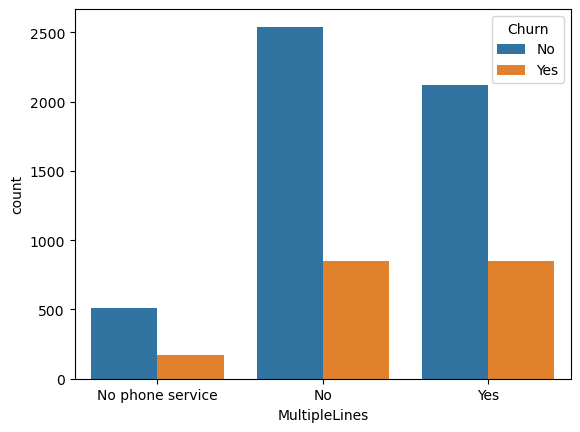

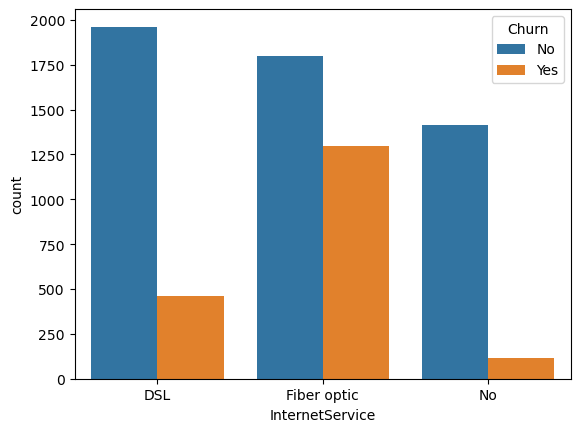

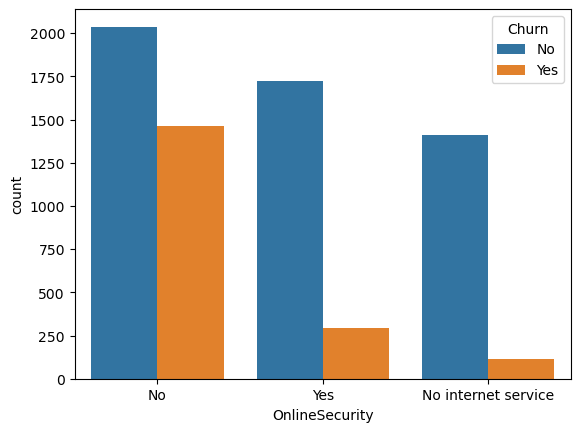

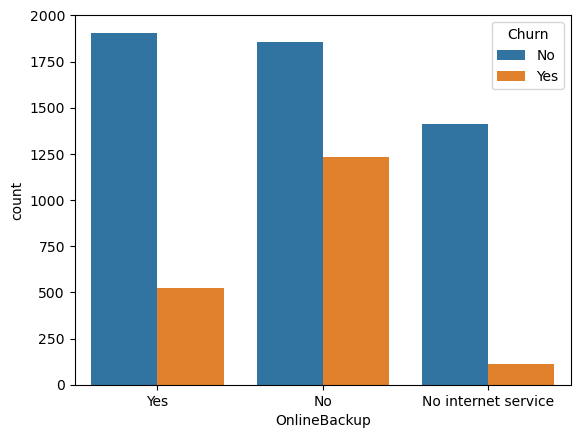

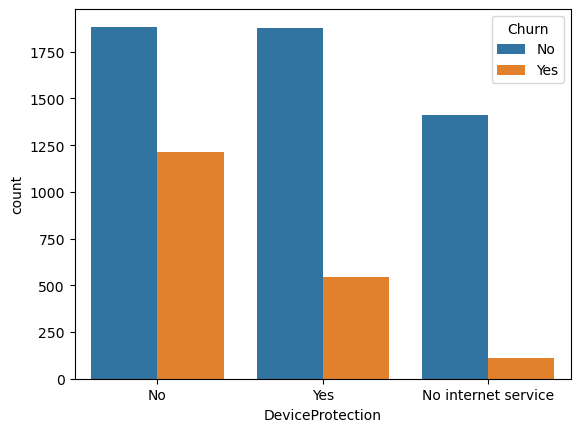

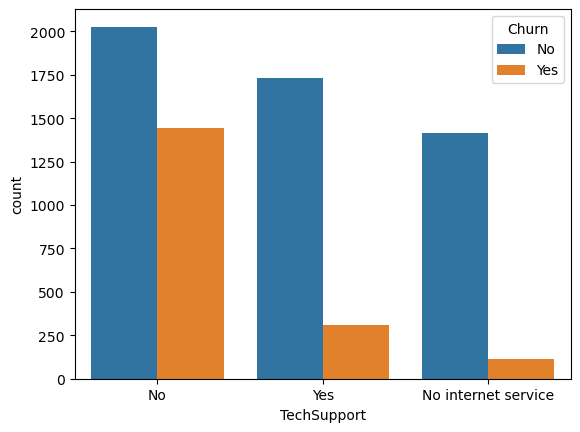

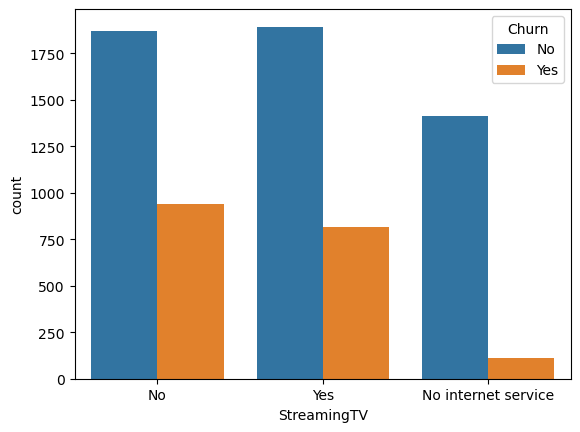

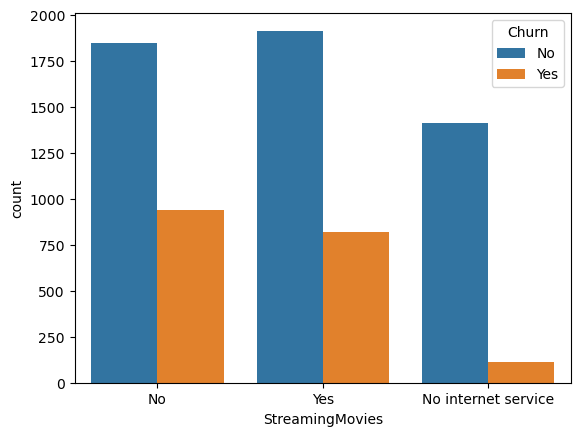

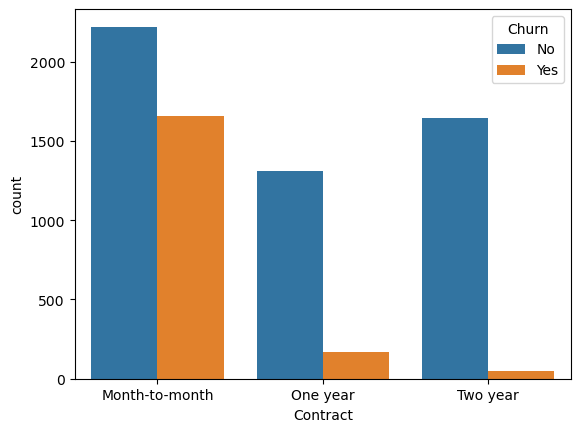

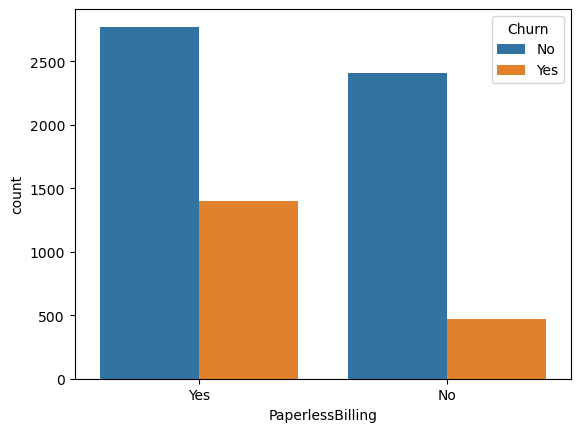

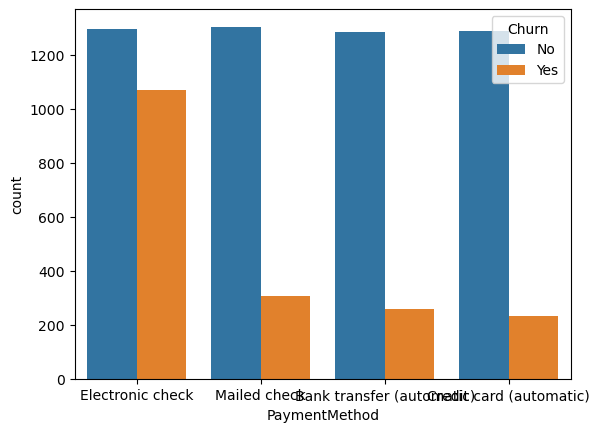

In [21]:
for i, predictor in enumerate(tele_churn_data.drop(columns=['customerID', 'tenure', 'Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tele_churn_data, x=predictor, hue='Churn')

In [22]:
# Distribution of target variable
tele_churn_data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

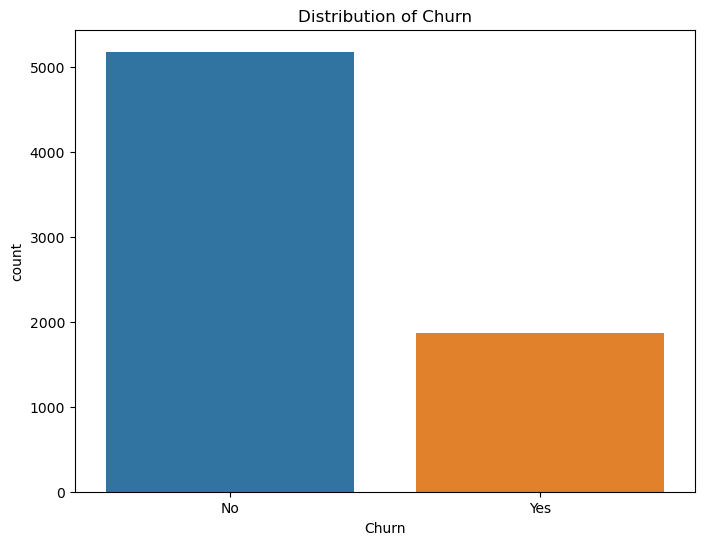

In [23]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=tele_churn_data, x='Churn')
plt.title('Distribution of Churn')
plt.show()

### 2. Feature Engineering:

In [25]:
# Encoding to numercial 
dataset = pd.get_dummies(tele_churn_data, columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges', 'Churn'], dtype = int)

In [26]:
# Print dataset
dataset

,customerID,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3668-QPYBK,0,2,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,9237-HQITU,0,2,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7039,2234-XADUH,0,72,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7040,4801-JZAZL,0,11,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
7041,8361-LTMKD,1,4,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Splitting the dataset into the training set and test set
X = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X

array([[ 0,  1,  1, ...,  0,  0,  0],
       [ 0, 34,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0, 11,  1, ...,  0,  0,  0],
       [ 1,  4,  0, ...,  0,  0,  0],
       [ 0, 66,  0, ...,  0,  0,  0]], dtype=int64)

In [33]:
y

array([0, 0, 1, ..., 0, 1, 0])

### 3. Model Building:

In [37]:
# Training the Decision Tree Classifier model on the training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
# Predicting a new result
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [39]:
'''
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Randomized Search object
random_search = RandomizedSearchCV(
    classifier, 
    param_distributions=param_grid, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=0
)

# Fit the Randomized Search the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Randomized Search Best hyperparameters: ", random_search.best_params_)
print(f"Randomized Search Best score:  {random_search.best_score_:.4f}")
'''

'\n# Define the hyperparameters to tune\nparam_grid = {\n    \'n_estimators\': [100, 500, 1000],\n    \'max_depth\': [10, 50, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Create a Randomized Search object\nrandom_search = RandomizedSearchCV(\n    classifier, \n    param_distributions=param_grid, \n    n_iter=10, \n    cv=5, \n    scoring=\'accuracy\', \n    n_jobs=-1, \n    random_state=0\n)\n\n# Fit the Randomized Search the data\nrandom_search.fit(X_train, y_train)\n\n# Print the best hyperparameters and corresponding score\nprint("Randomized Search Best hyperparameters: ", random_search.best_params_)\nprint(f"Randomized Search Best score:  {random_search.best_score_:.4f}")\n'

In [40]:
'''#Create a Grid Search object
grid_search = GridSearchCV(
    classifier, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

# Fit the Grid Search object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Grid Search Best hyperparameters: ", grid_search.best_params_)
print(f"Grid Search Best score: {grid_search.best_score_:.4f}")'''

'#Create a Grid Search object\ngrid_search = GridSearchCV(\n    classifier, \n    param_grid, \n    cv=5, \n    scoring=\'accuracy\',\n    n_jobs=-1\n)\n\n# Fit the Grid Search object to the data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters and corresponding score\nprint("Grid Search Best hyperparameters: ", grid_search.best_params_)\nprint(f"Grid Search Best score: {grid_search.best_score_:.4f}")'

### 4. Model Evaluation: 

In [43]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[955  86]
 [232 136]]


In [44]:
# Evaluation Metrics
# Accuracy
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {ac:.2f}")
# Precision
pr = precision_score(y_test, y_pred)
print(f"Precision: {pr:.2f}")
# Recall 
re = recall_score(y_test, y_pred)
print(f"Recall:    {re:.2f}")
# F1-Score
f = f1_score(y_test, y_pred)
print(f"F1-score:  {f:.2f}")
# AUC-ROC
ra = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC:   {ra:.2f}")

Accuracy:  0.77
Precision: 0.61
Recall:    0.37
F1-score:  0.46
AUC-ROC:   0.64
